In [94]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_gaussian_quantiles

In [95]:
N = 1000
gaussian_quantiles = make_gaussian_quantiles(mean=None,
                        cov=0.1,
                        n_samples = N,
                        n_features = 2,
                        n_classes = 2,
                        shuffle=True,
                        random_state=None
                       )
X, Y = gaussian_quantiles

In [96]:
Y =  Y[:,np.newaxis]

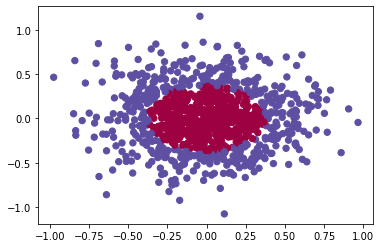

In [97]:
plt.scatter(X[:,0],X[:,1], c=Y[:,0], s=40,cmap=plt.cm.Spectral)

### Funciones de activación

In [98]:
def sigmoid(x, derivate= False):
    if derivate:
        return np.exp(-x)/((np.exp(-x)+1)**2)
    else:
        return  1/(1+np.exp(-x))

def relu(x, derivate=False):
    if derivate:
        x[x<=0] = 0
        x[x>0] = 1
        return x
        #return np.piecewise(x,[x<=0.0,x>=0.0],[0,lambda x: 1])
    else:
        return  np.maximum(0,x)
    

In [99]:
x=np.linspace(10,-10,1000)

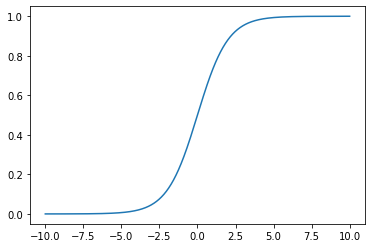

In [100]:
plt.plot(x,sigmoid(x))

### Función de perdida

In [101]:
def mse(y,y_hat, derivate=False):
    if derivate:
        return (y_hat - y)
    else:
        return np.mean((y_hat-y)**2)

In [102]:
def initialize_parameters_deep(layers_dim):
    parameters = {}
    L = len(layers_dim)
    for l in range(0,L-1):
        parameters['W'+str(l+1)] = (np.random.rand(layers_dim[l],layers_dim[l+1]) * 2) - 1
        parameters['b'+str(l+1)] = (np.random.rand(1,layers_dim[l+1]) * 2) - 1
    return parameters

In [103]:
layer_dims = [2,4,8,1]
params = initialize_parameters_deep(layer_dims)

In [104]:
params

{'W1': array([[ 0.39778735,  0.9256362 , -0.73484845, -0.13529112],
        [-0.59392019,  0.60085062,  0.73855305, -0.74530474]]),
 'b1': array([[-0.72409865,  0.12947513,  0.99546788,  0.69453339]]),
 'W2': array([[-0.54841807, -0.08917873, -0.24515192,  0.10768142, -0.47984361,
          0.91036735,  0.67733434, -0.58880297],
        [-0.54333375, -0.55328523,  0.53664678, -0.96235623,  0.39899104,
         -0.77099406,  0.4085885 , -0.54325658],
        [ 0.12813685, -0.17038981,  0.0588307 , -0.2486871 ,  0.39229379,
          0.92587767,  0.74951661,  0.4697266 ],
        [ 0.93287114,  0.6152942 ,  0.00265   , -0.98799769,  0.13470104,
         -0.41126074, -0.30325999, -0.67225548]]),
 'b2': array([[ 8.82288889e-01,  3.76359675e-02, -6.58323665e-01,
          3.50286148e-01, -9.74269286e-01,  2.38117826e-04,
          6.17031700e-01,  5.14115740e-01]]),
 'W3': array([[-0.43493086],
        [ 0.53478938],
        [ 0.08418122],
        [-0.07677229],
        [ 0.62719946],
     

In [105]:
params['W1'].shape

(2, 4)

In [106]:
X.shape

(1000, 2)

In [107]:
np.matmul(X,params['W1'])

array([[-0.23501574, -0.57872965,  0.43991553,  0.09515032],
       [ 0.08430117,  0.38938496, -0.19067813, -0.1209803 ],
       [ 0.39925002,  0.61939684, -0.68154916,  0.01214039],
       ...,
       [-0.05956736, -0.01944423,  0.08848892, -0.0366714 ],
       [-0.19311187,  0.28477534,  0.22396843, -0.28504904],
       [-0.19257787, -0.28395327,  0.32606569, -0.0129323 ]])

In [108]:
X@params['W1']

array([[-0.23501574, -0.57872965,  0.43991553,  0.09515032],
       [ 0.08430117,  0.38938496, -0.19067813, -0.1209803 ],
       [ 0.39925002,  0.61939684, -0.68154916,  0.01214039],
       ...,
       [-0.05956736, -0.01944423,  0.08848892, -0.0366714 ],
       [-0.19311187,  0.28477534,  0.22396843, -0.28504904],
       [-0.19257787, -0.28395327,  0.32606569, -0.0129323 ]])

In [109]:
X.dot(params['W1'])

array([[-0.23501574, -0.57872965,  0.43991553,  0.09515032],
       [ 0.08430117,  0.38938496, -0.19067813, -0.1209803 ],
       [ 0.39925002,  0.61939684, -0.68154916,  0.01214039],
       ...,
       [-0.05956736, -0.01944423,  0.08848892, -0.0366714 ],
       [-0.19311187,  0.28477534,  0.22396843, -0.28504904],
       [-0.19257787, -0.28395327,  0.32606569, -0.0129323 ]])

In [110]:
def train(x_data, lr, params,training = True):

    ## Forward programacion haacia adelante

    params['A0'] = x_data

    params['Z1'] = np.matmul(params['A0'],params['W1']) + params['b1']
    params['A1'] = relu(params['Z1'])

    params['Z2'] = np.matmul(params['A1'],params['W2']) + params['b2']
    params['A2'] = relu(params['Z2'])

    params['Z3'] = np.matmul(params['A2'],params['W3']) + params['b3']
    params['A3'] = sigmoid(params['Z3'])

    output = params['A3']

    if training:

        ## Backpropagation clase 16

        params['dZ3'] = mse(Y,output, True) * sigmoid(params['A3'],True)
        params['dW3'] = np.matmul(params['A2'].T,params['dZ3'])

        params['dZ2'] = np.matmul(params['dZ3'],params['W3'].T) * relu(params['A2'],True)
        params['dW2'] = np.matmul(params['A1'].T,params['dZ2'])

        params['dZ1'] = np.matmul(params['dZ2'],params['W2'].T) * relu(params['A1'],True)
        params['dW1'] = np.matmul(params['A0'].T,params['dZ1'])

        ## Gradient descent

        params['W3'] = params['W3'] - params['dW3'] * lr
        params['b3'] = params['b3'] - (np.mean(params['dW3'],axis=0, keepdims=True)) * lr

        params['W2'] = params['W2'] - params['dW2'] * lr
        params['b2'] = params['b2'] - (np.mean(params['dW2'],axis=0, keepdims=True)) * lr 

        params['W1'] = params['W1'] - params['dW1'] * lr
        params['b1'] = params['b1'] - (np.mean(params['dW1'],axis=0, keepdims=True)) * lr
    return output

In [127]:
layer_dims = [2,4,8,1]
params = initialize_parameters_deep(layer_dims)
errors = []
for _ in range(50000):
    output = train(X, 0.001, params)
    if _ % 25 == 0 :
        print(mse(Y,output))
        errors.append(mse(Y,output))

0.27480135085142193
0.24068280227299857
0.22735870125985952
0.20971231198648474
0.19413242133896783
0.18306258778324483
0.1765647331106346
0.1731929106503687
0.17168788203206417
0.1711044801409147
0.17091911031729987
0.17103389332305283
0.17097842760995183
0.17093745490132475
0.17062247113913173
0.17028234613303186
0.17004784792191466
0.16988270144482892
0.16975311830154466
0.16961920623869906
0.16939587627938443
0.16919406751174973
0.16899045607980753
0.16879534760734088
0.1685844181605243
0.16833007017610038
0.16790763818856413
0.16743518604120525
0.1669149771962195
0.1662876031829159
0.16539421836309912
0.16410253544092637
0.16077308396881526
0.1541704282403852
0.14788215158801443
0.17333876005078755
0.1809378760842245
0.16792656794300165
0.17860544324015032
0.16435355437170107
0.17268269699455263
0.16231117043437215
0.1740597282954617
0.16039742290033185
0.17103092646385534
0.15370529601195068
0.1624078621425579
0.15252777986303204
0.16100382966428958
0.1501131086768569
0.160502566

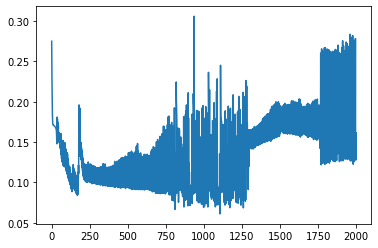

In [128]:
plt.plot(errors)

In [129]:
data_test = (np.random.rand(1000,2)*2)-1
y = train(data_test, 0.0001, params, training=False)

In [130]:
y = np.where (y >= 0.5, 1, 0)

In [131]:
y

array([[1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
    

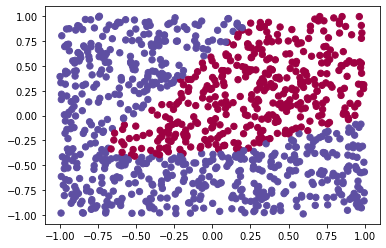

In [133]:
plt.scatter(data_test[:,0],data_test[:,1], c=y[:,0], s=40, cmap=plt.cm.Spectral);